In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bs = pd.read_excel("DirectComparefwd.xlsx",sheet_name="BankStatement") #bank statement
sr = pd.read_excel("DirectComparefwd.xlsx",sheet_name="SalesRegi") #SalesRegi

In [ ]:
bs.head(3).T

In [ ]:
bs.columns

retain all fields of bankstatement ; just rename the column ' Amount(INR)' which has few extra spaces

In [ ]:
bs[' Amount(INR)'].name

In [ ]:
bs.rename(columns= {' Amount(INR)' : 'Amount(INR)'},inplace=True);

In [ ]:
bs['Amount(INR)'].name

In [ ]:
bs.columns

In [ ]:
sr.head(3).T

sr is invoice raised dataset. "Net Amount" is the amount raised for payment.
let's clean-up and retain what all is required.

In [ ]:
sr.info()
#Fields to take
#["Date","SO No","Party Name","Customer PO Date","Category","Net Amount","SalesMan"]
#The field names are copied from the result of this very Jupyter-cell's command

In [ ]:
sr = sr.loc[:,["Date","SO No","Party Name","Customer PO Date","Category",
               "Net Amount","SalesMan"]]

In [ ]:
bs.head(3)

In [ ]:
sr.head(3).T

In [ ]:
bs.loc[:5,["CHQNO",'Transaction Particulars']] #Will  extract info from these columns

In bank-statement dataframe, `CHQNO` and `Transaction Particulars` have the descriptions about the parties. So to maximize the possibility of a match, let us concatenate these two strings. But we will retain all columns of bank-statement so that we get the future reference.

In [ ]:
#Utility Function - Need not be applied separately
import re
def extract_alpha_str(x):  #function renamed from initial 'create_word_vector'
    L = re.findall(r'[^\d\.\,/]{3,}',x)
    L1 = [word.lower() for word in L]
    return L1

In [ ]:
#Utility function -
#It uses extract_alpha_str and converts the strings to phrases 
def create_word_vector_from_str_array(pandas_series):
    wd = {}
    for i,x in (pandas_series.items()): #this separates index & values

        try:
            wd[i]=extract_alpha_str(x)   #Why ? because blank cell is Nan which is not str 
        except:
            TypeError
            wd[i] = ["missing"]
            
    if not len(wd)==len(pandas_series):
        print("String to vector conversion did not happen correctly. Check.")
    word_vector = pd.Series(wd)
    return word_vector

In [ ]:
#Utility FUnction - convert a list of phrases to a list of words 
# - Need not be applied separately

def phrase_to_single_words(list_of_phrases):
    """ This converts a list of phrases and words mixed together to list of words"""
    word_list = []
    for phrase in list_of_phrases:
        L = phrase.split(" ") #generate a list for each phrase
        word_list += L
    return word_list

In [ ]:
#Make the phrase_to_single_words function applicable to pandas series


def generate_single_word_list(pandas_series,stop_word_list=None):
    wd = {}
    for i,x in (pandas_series.items()): # x is the numpy array ; i is the index array
        try :                          # NaN should not occur, still a harmless protection
            
            L1 = phrase_to_single_words(x)
            #L2 = [w for w in L1 if w not in stop_word_list]
            L3 = [w for w in L1 if len(w)>2]
            L4 = list(set(L3))
            wd[i] = L4
        except:
            TypeError 
            print("An unexpected TypeError occurred")
    
    if not len(wd)==len(pandas_series):
        print("String to vector conversion did not happen correctly. Check.")
    
    word_vector = pd.Series(wd)
    
    return word_vector 

In [ ]:
bs_chq_phrases = create_word_vector_from_str_array(bs.loc[:,"CHQNO"])

In [ ]:
bs_chq_words = generate_single_word_list(bs_chq_phrases)

In [ ]:
bs_chq_words.values

#Repeat the above steps for bs['Transaction Particulars']

In [ ]:
bs_Trn_phrase = create_word_vector_from_str_array(bs.loc[:,"Transaction Particulars"])
bs_Trn_words = generate_single_word_list(bs_Trn_phrase)

In [ ]:
bs_Trn_words.values

### Now join two lists into one

In [ ]:
bs_remitter = bs_chq_words.values + bs_Trn_words.values

In [ ]:
bs_remitter = [list(set(w)) for w in bs_remitter]

In [ ]:
bs_remitter[:5]

In [ ]:
bs_remitter[60]

In [ ]:
len(bs_remitter)

In [ ]:
type(bs_remitter)

### Do this treatment for sr dataframe as well

In [ ]:
sr_party_phrase = create_word_vector_from_str_array(sr.loc[:,"Party Name"])

In [ ]:
sr_party_words = generate_single_word_list(sr_party_phrase)

In [ ]:
len(sr_party_words)

In [ ]:
type(sr_party_words)

In [ ]:
sr_party_words_list = list(sr_party_words.values)

In [ ]:
len(sr_party_words_list)

In [ ]:
type(sr_party_words_list)

In [ ]:
sr_party_words_list[:5]

In [ ]:
sr_party_words_list[5]

### Create Bank statement stopword list

In [ ]:
L1 = []
for inside_list in bs_remitter:
    for item in inside_list:
        L1.append(item)
L1[:5]

### Create Sales Register stopword list 

In [ ]:
L2 = []
for inside_list in sr_party_words_list:
    for item in inside_list:
        L2.append(item)
L2[:5]

In [ ]:
#Join L1 and L2
L3 = L1 + L2

In [ ]:
A = np.array(L3)

A1 = np.unique(A,return_counts=True)

df=pd.DataFrame({'Word':A1[0],'Frequency':A1[1]})

df1 = df.sort_values(by="Frequency",ascending=False)

df1.head(3)

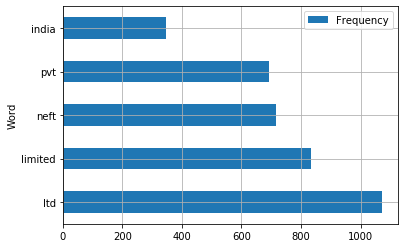

In [46]:
df1[:5].plot.barh(x="Word",grid=True)
plt.show()

In [45]:
#Save the words which have been repeated more than a certain times - manually verify

In [ ]:
#B = list(filter(lambda x: (len(x)<3),A)) #check if there is any small but imp words 
#B

In [ ]:
#Create a csv for futuer reference

df1.to_csv('stop_words.csv',index=False)